In [66]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [77]:
path_to_data = r'C:\Users\Rory\raw_data\SERT_DREADD\spikes_df'

recordings_to_analyse = ['2018-04-18']

In [78]:
file = '\\'.join([path_to_data, recordings_to_analyse[0]]) + '.csv'
df = pd.read_csv(file, index_col=0)

In [79]:
df.head()

,spike_cluster,time,condition
1,161,0.024200,Baseline
2,356,0.027333,Baseline
6,315,0.078733,Baseline
7,251,0.096967,Baseline
10,364,0.132467,Baseline


In [81]:
# compute mean in first period

baseline = df.loc[df['condition'] == 'Baseline']
mean_firing_rates = baseline.groupby('spike_cluster')['time'].agg(lambda x: x.count() /float(x.max()-x.min()))

In [82]:
df['time'] = pd.to_timedelta(df['time'], unit='s')
df['spike'] = 1
df1 = df.pivot_table(index='time', columns='spike_cluster', values='spike', aggfunc='count')

In [83]:
sec = df1.resample('s').count()

In [84]:
rolling = sec.rolling(60*2).mean()

In [108]:
mean_firing_rates

spike_cluster
0       1.616708
14     10.273343
19      0.275236
37      0.549215
48      0.888568
64      5.894264
72      3.103049
92      0.271303
159     0.039020
161     2.507889
215     0.966673
219     0.367072
225     1.402228
235     1.892050
245     0.422795
251     2.262884
253     0.372252
255     1.303910
257     2.210440
259     1.374001
261     1.153212
273     0.662743
279     2.890424
307     6.869075
315     4.163621
322     4.403869
325     7.457689
341     0.285892
349     2.133519
356     2.224484
360     2.264879
364     1.853649
374     2.914895
384     9.019431
396     1.226950
401     0.540506
418     1.208826
Name: time, dtype: float64

In [103]:
tidy_rolling = rolling.reset_index().melt(id_vars='time', value_name='mean_firing_rate').set_index('spike_cluster')

In [114]:
normed= tidy_rolling.groupby('time').apply(lambda group: group['mean_firing_rate'].divide(mean_firing_rates))

In [115]:
normed.index()

spike_cluster,0,14,19,37,48,64,72,92,159,161,...,341,349,356,360,364,374,384,396,401,418
time,,,,,,,,,,,,,,,,,,,,,
00:00:00.024200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:01.024200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:02.024200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:03.024200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:04.024200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


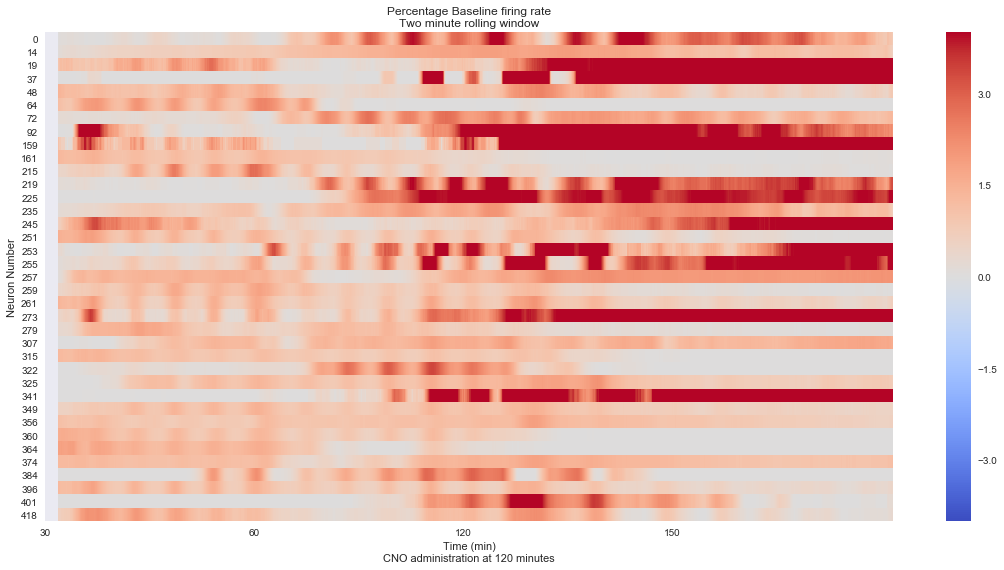

In [139]:
f, a = plt.subplots(figsize=(19, 9))
sns.heatmap(normed.transpose(), ax=a, cmap='coolwarm', vmin=-4, vmax=4, xticklabels=1800)
a.set_ylabel('Neuron Number')
a.set_title('Percentage Baseline firing rate\nTwo minute rolling window')
a.set_xticklabels('30 60 120 150'.split())
a.set_xlabel('Time (min)\nCNO administration at 120 minutes')
plt.savefig(r'C:\Users\Rory\raw_data\SERT_DREADD\figures\heat.png', dpi=600)